In [26]:
import scanpy as sc
adata = sc.read('../data/xenium/improved_outs/grouped_filtered_stardist_adata.h5ad')

In [27]:
adata

AnnData object with n_obs × n_vars = 83947 × 541
    obs: 'id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'clusters'
    var: 'transcript_ids', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'clusters', 'hvg', 'log1p', 'neighbors', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [28]:
import pandas as pd
csv_data = pd.read_csv('../data/xenium/41467_2023_43458_MOESM4_ESM.csv')

In [29]:
csv_data

,Genes,DCIS_1,DCIS_2,Prolif_Invasive_Tumor,Invasive_Tumor,Myoepi_ACTA2+,Myoepi_KRT15+,T_Cell_&_Tumor_Hybrid,CD8+_T_Cells,CD4+_T_Cells,...,Stromal_&_T_Cell_Hybrid,IRF7+_DCs,B_Cells,Macrophages_1,Macrophages_2,LAMP3+_DCs,Mast_Cells,Stromal,Perivascular-Like,Endothelial
0,SERPINA3,2.327150,1.637294,-0.531378,-0.544919,2.075936,1.664456,-0.502572,-0.538760,-0.589960,...,-0.502320,-0.536950,-0.521432,-0.458220,-0.473244,-0.554848,-0.426263,-0.244188,-0.556693,-0.331122
1,ESR1,3.572079,1.791021,0.300844,-0.042592,0.431788,-0.202569,-0.396183,-0.562775,-0.591560,...,-0.545251,-0.544589,-0.262311,-0.392398,-0.239356,-0.623361,-0.279893,-0.162283,-0.483418,-0.440892
2,CEACAM6,3.621209,1.786169,-0.422193,-0.382355,0.341947,0.349583,-0.382157,-0.461351,-0.501984,...,-0.433649,-0.389543,-0.414885,-0.384354,-0.346393,-0.470224,-0.313836,-0.174916,-0.478270,-0.377087
3,CEACAM8,3.330266,2.191152,0.004957,0.029682,0.223742,0.457422,-0.379674,-0.500369,-0.529298,...,-0.526940,-0.497042,-0.495499,-0.416960,-0.383465,-0.526286,-0.369060,-0.340507,-0.524282,-0.445508
4,AGR3,2.219148,3.213558,0.083560,-0.248952,0.960034,-0.119078,-0.398760,-0.508153,-0.529606,...,-0.472275,-0.485073,-0.449064,-0.429822,-0.447497,-0.517179,-0.364233,-0.298631,-0.514593,-0.436912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,PPARG,-0.338426,-0.507219,0.316962,-0.141006,-0.559448,-0.584905,-0.120495,-0.537300,-0.639934,...,-0.572286,-0.500312,-0.480455,0.200765,0.104691,-0.464516,-0.419073,0.760710,0.824744,3.822161
309,TCF15,-0.431056,-0.359757,-0.238780,-0.325422,-0.330731,-0.402823,0.306865,-0.162181,-0.415775,...,0.046680,-0.648853,-0.310222,-0.283616,-0.128917,-0.648853,-0.648853,0.190319,0.846502,3.968071
310,TCF4,-0.705485,-0.731847,-0.684185,-0.685841,-0.396396,-0.716368,-0.583386,-0.497069,-0.582606,...,-0.423529,2.517738,0.249668,-0.136094,0.119409,-0.297976,-0.391752,1.085481,0.502645,2.658135
311,AKR1C1,0.298755,-0.465756,-0.794885,-0.797805,0.059594,2.073501,-0.855245,-0.795098,-0.837757,...,-0.140717,0.982352,-0.742926,-0.328333,0.075570,-0.860275,-0.245074,2.076440,-0.297012,2.012176


In [30]:
csv_data = csv_data.drop(columns=['Unlabeled'])

In [33]:
csv_data = csv_data.rename(columns={
    'tmp': 'DCIS_2'
})

In [34]:
adata_genes = adata.var_names
adata_genes

Index(['ABCC11', 'ACTA2', 'ACTG2', 'ADAM9', 'ADGRE5', 'ADH1B', 'ADIPOQ',
       'AGR3', 'AHSP', 'AIF1',
       ...
       'ZEB2', 'ZNF562', 'antisense_ADCY4', 'antisense_BCL2L15',
       'antisense_LGI3', 'antisense_MYLIP', 'antisense_PROKR2',
       'antisense_SCRIB', 'antisense_TRMU', 'antisense_ULK3'],
      dtype='object', name='feature_name', length=541)

In [35]:
# Extract gene names from AnnData and CSV
adata_genes = adata.var_names
csv_genes = csv_data['Genes']

# Ensure genes in both datasets match
common_genes = adata_genes.intersection(csv_genes)

# Subset AnnData and CSV data to include only common genes
adata = adata[:, common_genes]
csv_data = csv_data[csv_data['Genes'].isin(common_genes)]


In [36]:
adata.var.index

Index(['ABCC11', 'ACTA2', 'ACTG2', 'ADAM9', 'ADGRE5', 'ADH1B', 'ADIPOQ',
       'AGR3', 'AHSP', 'AIF1',
       ...
       'TUBB2B', 'TYROBP', 'UCP1', 'USP53', 'VOPP1', 'VWF', 'WARS', 'ZEB1',
       'ZEB2', 'ZNF562'],
      dtype='object', name='feature_name', length=313)

In [37]:
csv_data['Genes']

0      SERPINA3
1          ESR1
2       CEACAM6
3       CEACAM8
4          AGR3
         ...   
308       PPARG
309       TCF15
310        TCF4
311      AKR1C1
312      AKR1C3
Name: Genes, Length: 313, dtype: object

In [38]:
csv_data

,Genes,DCIS_2,DCIS_1,Prolif_Invasive_Tumor,Invasive_Tumor,Myoepi_ACTA2+,Myoepi_KRT15+,T_Cell_&_Tumor_Hybrid,CD8+_T_Cells,CD4+_T_Cells,Stromal_&_T_Cell_Hybrid,IRF7+_DCs,B_Cells,Macrophages_1,Macrophages_2,LAMP3+_DCs,Mast_Cells,Stromal,Perivascular-Like,Endothelial
0,SERPINA3,2.327150,1.637294,-0.531378,-0.544919,2.075936,1.664456,-0.502572,-0.538760,-0.589960,-0.502320,-0.536950,-0.521432,-0.458220,-0.473244,-0.554848,-0.426263,-0.244188,-0.556693,-0.331122
1,ESR1,3.572079,1.791021,0.300844,-0.042592,0.431788,-0.202569,-0.396183,-0.562775,-0.591560,-0.545251,-0.544589,-0.262311,-0.392398,-0.239356,-0.623361,-0.279893,-0.162283,-0.483418,-0.440892
2,CEACAM6,3.621209,1.786169,-0.422193,-0.382355,0.341947,0.349583,-0.382157,-0.461351,-0.501984,-0.433649,-0.389543,-0.414885,-0.384354,-0.346393,-0.470224,-0.313836,-0.174916,-0.478270,-0.377087
3,CEACAM8,3.330266,2.191152,0.004957,0.029682,0.223742,0.457422,-0.379674,-0.500369,-0.529298,-0.526940,-0.497042,-0.495499,-0.416960,-0.383465,-0.526286,-0.369060,-0.340507,-0.524282,-0.445508
4,AGR3,2.219148,3.213558,0.083560,-0.248952,0.960034,-0.119078,-0.398760,-0.508153,-0.529606,-0.472275,-0.485073,-0.449064,-0.429822,-0.447497,-0.517179,-0.364233,-0.298631,-0.514593,-0.436912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,PPARG,-0.338426,-0.507219,0.316962,-0.141006,-0.559448,-0.584905,-0.120495,-0.537300,-0.639934,-0.572286,-0.500312,-0.480455,0.200765,0.104691,-0.464516,-0.419073,0.760710,0.824744,3.822161
309,TCF15,-0.431056,-0.359757,-0.238780,-0.325422,-0.330731,-0.402823,0.306865,-0.162181,-0.415775,0.046680,-0.648853,-0.310222,-0.283616,-0.128917,-0.648853,-0.648853,0.190319,0.846502,3.968071
310,TCF4,-0.705485,-0.731847,-0.684185,-0.685841,-0.396396,-0.716368,-0.583386,-0.497069,-0.582606,-0.423529,2.517738,0.249668,-0.136094,0.119409,-0.297976,-0.391752,1.085481,0.502645,2.658135
311,AKR1C1,0.298755,-0.465756,-0.794885,-0.797805,0.059594,2.073501,-0.855245,-0.795098,-0.837757,-0.140717,0.982352,-0.742926,-0.328333,0.075570,-0.860275,-0.245074,2.076440,-0.297012,2.012176


In [39]:
# Ensure both gene lists are in the same case
adata_genes = adata.var.index.str.upper()
csv_genes = csv_data['Genes'].str.upper()

# Create a mapping between adata genes and csv data rows
csv_data.index = csv_genes  # Set the gene names as the index for easier lookup

# Filter and reorder the csv_data to match the order of adata genes
csv_data_reordered = csv_data.loc[adata_genes].dropna()


In [40]:
csv_data_reordered

,Genes,DCIS_2,DCIS_1,Prolif_Invasive_Tumor,Invasive_Tumor,Myoepi_ACTA2+,Myoepi_KRT15+,T_Cell_&_Tumor_Hybrid,CD8+_T_Cells,CD4+_T_Cells,Stromal_&_T_Cell_Hybrid,IRF7+_DCs,B_Cells,Macrophages_1,Macrophages_2,LAMP3+_DCs,Mast_Cells,Stromal,Perivascular-Like,Endothelial
feature_name,,,,,,,,,,,,,,,,,,,,
ABCC11,ABCC11,1.627568,0.103818,2.462698,2.652923,-0.413890,-0.182707,-0.054479,-0.535060,-0.568054,-0.519494,-0.529454,-0.511962,-0.387892,-0.478463,-0.555539,-0.528292,-0.302518,-0.512950,-0.437394
ACTA2,ACTA2,-0.147560,-0.456253,-0.286599,-0.374978,1.571581,-0.483258,-0.433844,-0.492023,-0.546879,-0.432903,-0.465872,-0.521565,-0.394747,-0.415543,-0.463975,-0.431397,0.463068,3.544140,0.951923
ACTG2,ACTG2,0.853811,-0.101744,0.688588,0.183123,3.298948,0.150006,-0.518020,-0.761809,-1.017506,-0.860185,-0.642513,-0.843472,-0.052951,-0.619625,0.133467,-0.877556,0.046004,1.351866,-0.098524
ADAM9,ADAM9,0.641999,0.996737,1.973919,1.070857,0.038601,2.348248,-0.512094,-1.002861,-1.126528,-0.955982,-0.717369,-0.940024,-0.068820,0.414614,-0.933312,-0.837433,0.295960,-0.161226,0.060463
ADGRE5,ADGRE5,-1.317558,-1.461023,-1.489023,-1.474173,-0.976652,-0.554050,0.848954,1.859226,0.431848,0.822463,0.187711,0.567568,0.284671,0.503026,-1.030036,0.021441,0.341775,1.422454,0.435202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VWF,VWF,-0.308381,-0.310295,-0.242985,-0.257147,-0.276106,-0.322238,-0.198615,-0.230621,-0.234133,-0.248283,-0.177224,-0.243774,-0.219656,-0.175439,-0.217009,-0.172035,-0.062523,-0.182650,4.241487
WARS,WARS,0.423956,-0.096414,1.314041,0.660351,0.165117,0.349285,-0.436244,-0.946291,-1.405793,-1.075456,-0.946109,0.297322,1.113842,-0.906031,1.670549,-1.236518,0.500974,-0.835508,1.923884
ZEB1,ZEB1,-0.924201,-0.962277,-0.767225,-0.781500,0.157335,-0.981748,-0.140023,-0.113061,-0.460319,-0.137586,-0.151832,-0.118053,-0.212667,-0.365105,0.257218,-0.229417,1.932190,0.861553,3.155753


In [41]:

csv_data_reordered = csv_data_reordered.drop(columns='Genes')

In [42]:
csv_data_reordered

,DCIS_2,DCIS_1,Prolif_Invasive_Tumor,Invasive_Tumor,Myoepi_ACTA2+,Myoepi_KRT15+,T_Cell_&_Tumor_Hybrid,CD8+_T_Cells,CD4+_T_Cells,Stromal_&_T_Cell_Hybrid,IRF7+_DCs,B_Cells,Macrophages_1,Macrophages_2,LAMP3+_DCs,Mast_Cells,Stromal,Perivascular-Like,Endothelial
feature_name,,,,,,,,,,,,,,,,,,,
ABCC11,1.627568,0.103818,2.462698,2.652923,-0.413890,-0.182707,-0.054479,-0.535060,-0.568054,-0.519494,-0.529454,-0.511962,-0.387892,-0.478463,-0.555539,-0.528292,-0.302518,-0.512950,-0.437394
ACTA2,-0.147560,-0.456253,-0.286599,-0.374978,1.571581,-0.483258,-0.433844,-0.492023,-0.546879,-0.432903,-0.465872,-0.521565,-0.394747,-0.415543,-0.463975,-0.431397,0.463068,3.544140,0.951923
ACTG2,0.853811,-0.101744,0.688588,0.183123,3.298948,0.150006,-0.518020,-0.761809,-1.017506,-0.860185,-0.642513,-0.843472,-0.052951,-0.619625,0.133467,-0.877556,0.046004,1.351866,-0.098524
ADAM9,0.641999,0.996737,1.973919,1.070857,0.038601,2.348248,-0.512094,-1.002861,-1.126528,-0.955982,-0.717369,-0.940024,-0.068820,0.414614,-0.933312,-0.837433,0.295960,-0.161226,0.060463
ADGRE5,-1.317558,-1.461023,-1.489023,-1.474173,-0.976652,-0.554050,0.848954,1.859226,0.431848,0.822463,0.187711,0.567568,0.284671,0.503026,-1.030036,0.021441,0.341775,1.422454,0.435202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VWF,-0.308381,-0.310295,-0.242985,-0.257147,-0.276106,-0.322238,-0.198615,-0.230621,-0.234133,-0.248283,-0.177224,-0.243774,-0.219656,-0.175439,-0.217009,-0.172035,-0.062523,-0.182650,4.241487
WARS,0.423956,-0.096414,1.314041,0.660351,0.165117,0.349285,-0.436244,-0.946291,-1.405793,-1.075456,-0.946109,0.297322,1.113842,-0.906031,1.670549,-1.236518,0.500974,-0.835508,1.923884
ZEB1,-0.924201,-0.962277,-0.767225,-0.781500,0.157335,-0.981748,-0.140023,-0.113061,-0.460319,-0.137586,-0.151832,-0.118053,-0.212667,-0.365105,0.257218,-0.229417,1.932190,0.861553,3.155753


In [43]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Convert AnnData matrix to dense format (if it's sparse)
adata_matrix = adata.X.toarray() if hasattr(adata.X, 'toarray') else adata.X

# Convert CSV data to NumPy array
csv_matrix = csv_data_reordered.values
csv_matrix = csv_matrix.T

# Initialize a dictionary to store similarities
similarity_results = {}

# Compute cosine similarity for each cell in adata with each cell in CSV data
for i, adata_row in enumerate(adata_matrix):
    similarities = cosine_similarity([adata_row], csv_matrix)
    similarity_results[adata.obs.index[i]] = similarities.flatten()

similarity_results

{'ID_100000': array([ 0.53273762,  0.41526233,  0.48359851,  0.50426581,  0.10223009,
         0.13778742, -0.0541705 , -0.23524375, -0.34942139, -0.36280334,
        -0.21317632, -0.14884537, -0.13235898, -0.16671113, -0.23485205,
        -0.20258635, -0.05130395, -0.20172576, -0.07746066]),
 'ID_100002': array([ 0.07981894,  0.00251578,  0.05175503, -0.00396617,  0.04334161,
        -0.00768934, -0.11405821, -0.12060623, -0.20184863, -0.16845139,
        -0.00241609, -0.01773777, -0.00983651, -0.01663904, -0.13224934,
        -0.10398797,  0.17049684, -0.00947398,  0.29198568]),
 'ID_100004': array([ 0.54985853,  0.45282654,  0.48189434,  0.50078445,  0.08263766,
         0.13427466, -0.02765164, -0.22431978, -0.33592734, -0.33821132,
        -0.18547089, -0.19263341, -0.13768747, -0.18169971, -0.24830276,
        -0.22204631, -0.04491893, -0.22634989, -0.07819653]),
 'ID_100005': array([-0.06563992, -0.09044773, -0.0295474 , -0.06478572, -0.00860506,
        -0.03644323, -0.10060068

In [44]:
# Extract column names from CSV data
column_names = csv_data_reordered.columns.tolist()


In [45]:
similarity_df = pd.DataFrame(similarity_results).T  # Transpose to have cell IDs as rows

# Set column names
similarity_df.columns = column_names

# Display the resulting DataFrame
print(similarity_df)

             DCIS_2    DCIS_1  Prolif_Invasive_Tumor  Invasive_Tumor   
ID_100000  0.532738  0.415262               0.483599        0.504266  \
ID_100002  0.079819  0.002516               0.051755       -0.003966   
ID_100004  0.549859  0.452827               0.481894        0.500784   
ID_100005 -0.065640 -0.090448              -0.029547       -0.064786   
ID_100008 -0.055143 -0.160582              -0.024841       -0.097096   
...             ...       ...                    ...             ...   
ID_99987   0.093431  0.072732               0.058803        0.035426   
ID_99989  -0.039770 -0.099264              -0.058423       -0.117910   
ID_99991   0.481582  0.315846               0.412417        0.435164   
ID_99995   0.543553  0.409987               0.382700        0.401297   
ID_99999  -0.011366 -0.169982               0.035755       -0.077007   

           Myoepi_ACTA2+  Myoepi_KRT15+  T_Cell_&_Tumor_Hybrid  CD8+_T_Cells   
ID_100000       0.102230       0.137787              -0

In [46]:
similarity_df['CellType'] = similarity_df.idxmax(axis=1)

# Display the DataFrame with the new 'CellType' column
print(similarity_df[['CellType']])

                        CellType
ID_100000                 DCIS_2
ID_100002            Endothelial
ID_100004                 DCIS_2
ID_100005          Macrophages_2
ID_100008  T_Cell_&_Tumor_Hybrid
...                          ...
ID_99987           Myoepi_ACTA2+
ID_99989                 Stromal
ID_99991                  DCIS_2
ID_99995                  DCIS_2
ID_99999            CD8+_T_Cells

[83947 rows x 1 columns]


In [47]:
similarity_df

,DCIS_2,DCIS_1,Prolif_Invasive_Tumor,Invasive_Tumor,Myoepi_ACTA2+,Myoepi_KRT15+,T_Cell_&_Tumor_Hybrid,CD8+_T_Cells,CD4+_T_Cells,Stromal_&_T_Cell_Hybrid,IRF7+_DCs,B_Cells,Macrophages_1,Macrophages_2,LAMP3+_DCs,Mast_Cells,Stromal,Perivascular-Like,Endothelial,CellType
ID_100000,0.532738,0.415262,0.483599,0.504266,0.102230,0.137787,-0.054171,-0.235244,-0.349421,-0.362803,-0.213176,-0.148845,-0.132359,-0.166711,-0.234852,-0.202586,-0.051304,-0.201726,-0.077461,DCIS_2
ID_100002,0.079819,0.002516,0.051755,-0.003966,0.043342,-0.007689,-0.114058,-0.120606,-0.201849,-0.168451,-0.002416,-0.017738,-0.009837,-0.016639,-0.132249,-0.103988,0.170497,-0.009474,0.291986,Endothelial
ID_100004,0.549859,0.452827,0.481894,0.500784,0.082638,0.134275,-0.027652,-0.224320,-0.335927,-0.338211,-0.185471,-0.192633,-0.137687,-0.181700,-0.248303,-0.222046,-0.044919,-0.226350,-0.078197,DCIS_2
ID_100005,-0.065640,-0.090448,-0.029547,-0.064786,-0.008605,-0.036443,-0.100601,-0.037364,-0.128605,-0.088150,0.051872,0.004035,0.182739,0.347992,-0.103839,0.012896,0.091626,-0.011310,-0.018203,Macrophages_2
ID_100008,-0.055143,-0.160582,-0.024841,-0.097096,-0.044014,-0.076185,0.243888,0.234780,0.072029,0.114980,0.013133,0.016430,0.052127,-0.093608,0.063395,-0.131673,0.018575,-0.079294,-0.020696,T_Cell_&_Tumor_Hybrid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ID_99987,0.093431,0.072732,0.058803,0.035426,0.358556,0.198855,-0.085313,-0.099747,-0.147516,-0.144698,-0.084709,-0.095211,-0.072202,-0.060614,-0.116525,-0.099896,0.032016,0.050648,0.002100,Myoepi_ACTA2+
ID_99989,-0.039770,-0.099264,-0.058423,-0.117910,-0.075991,-0.071284,-0.047114,-0.002018,-0.052419,0.018298,0.119612,-0.016489,0.066684,0.032539,-0.018451,0.111825,0.205105,-0.091602,0.065152,Stromal
ID_99991,0.481582,0.315846,0.412417,0.435164,0.038016,0.135528,-0.066499,-0.198026,-0.301702,-0.321039,-0.170398,-0.141053,-0.094658,-0.110892,-0.185322,-0.166904,-0.048636,-0.204992,-0.057047,DCIS_2
ID_99995,0.543553,0.409987,0.382700,0.401297,0.100591,0.144560,-0.067134,-0.217288,-0.319550,-0.324051,-0.163547,-0.138216,-0.113796,-0.150697,-0.237386,-0.197333,-0.036688,-0.187699,-0.061469,DCIS_2


In [48]:
numeric_df = similarity_df.drop(columns=['CellType'])

# Find the maximum value per row
similarity_df['similarity'] = numeric_df.max(axis=1)

In [49]:
similarity_df

,DCIS_2,DCIS_1,Prolif_Invasive_Tumor,Invasive_Tumor,Myoepi_ACTA2+,Myoepi_KRT15+,T_Cell_&_Tumor_Hybrid,CD8+_T_Cells,CD4+_T_Cells,Stromal_&_T_Cell_Hybrid,...,B_Cells,Macrophages_1,Macrophages_2,LAMP3+_DCs,Mast_Cells,Stromal,Perivascular-Like,Endothelial,CellType,similarity
ID_100000,0.532738,0.415262,0.483599,0.504266,0.102230,0.137787,-0.054171,-0.235244,-0.349421,-0.362803,...,-0.148845,-0.132359,-0.166711,-0.234852,-0.202586,-0.051304,-0.201726,-0.077461,DCIS_2,0.532738
ID_100002,0.079819,0.002516,0.051755,-0.003966,0.043342,-0.007689,-0.114058,-0.120606,-0.201849,-0.168451,...,-0.017738,-0.009837,-0.016639,-0.132249,-0.103988,0.170497,-0.009474,0.291986,Endothelial,0.291986
ID_100004,0.549859,0.452827,0.481894,0.500784,0.082638,0.134275,-0.027652,-0.224320,-0.335927,-0.338211,...,-0.192633,-0.137687,-0.181700,-0.248303,-0.222046,-0.044919,-0.226350,-0.078197,DCIS_2,0.549859
ID_100005,-0.065640,-0.090448,-0.029547,-0.064786,-0.008605,-0.036443,-0.100601,-0.037364,-0.128605,-0.088150,...,0.004035,0.182739,0.347992,-0.103839,0.012896,0.091626,-0.011310,-0.018203,Macrophages_2,0.347992
ID_100008,-0.055143,-0.160582,-0.024841,-0.097096,-0.044014,-0.076185,0.243888,0.234780,0.072029,0.114980,...,0.016430,0.052127,-0.093608,0.063395,-0.131673,0.018575,-0.079294,-0.020696,T_Cell_&_Tumor_Hybrid,0.243888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ID_99987,0.093431,0.072732,0.058803,0.035426,0.358556,0.198855,-0.085313,-0.099747,-0.147516,-0.144698,...,-0.095211,-0.072202,-0.060614,-0.116525,-0.099896,0.032016,0.050648,0.002100,Myoepi_ACTA2+,0.358556
ID_99989,-0.039770,-0.099264,-0.058423,-0.117910,-0.075991,-0.071284,-0.047114,-0.002018,-0.052419,0.018298,...,-0.016489,0.066684,0.032539,-0.018451,0.111825,0.205105,-0.091602,0.065152,Stromal,0.205105
ID_99991,0.481582,0.315846,0.412417,0.435164,0.038016,0.135528,-0.066499,-0.198026,-0.301702,-0.321039,...,-0.141053,-0.094658,-0.110892,-0.185322,-0.166904,-0.048636,-0.204992,-0.057047,DCIS_2,0.481582
ID_99995,0.543553,0.409987,0.382700,0.401297,0.100591,0.144560,-0.067134,-0.217288,-0.319550,-0.324051,...,-0.138216,-0.113796,-0.150697,-0.237386,-0.197333,-0.036688,-0.187699,-0.061469,DCIS_2,0.543553


In [50]:
import pandas as pd

# Assuming similarity_df is already defined

# Drop the 'CellType' column and retain only numerical data
similarity_data = similarity_df.drop(columns=['CellType'])

In [51]:
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)

/Users/lollijagladiseva/anaconda3/lib/python3.11/site-packages/scanpy/preprocessing/_pca.py:325: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm["X_pca"] = X_pca
/Users/lollijagladiseva/anaconda3/lib/python3.11/site-packages/scipy/sparse/_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)
2024-09-01 19:34:27.127755: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [52]:
celltype_df = similarity_df[['CellType']].copy()

In [53]:
adata2_indices = adata.obs.index
celltype_df_indices = celltype_df.index

print(adata2_indices.equals(celltype_df_indices))

True


In [54]:
adata.obs['CellType'] = celltype_df['CellType']

In [55]:
adata.obs['similarity'] = similarity_df['similarity']

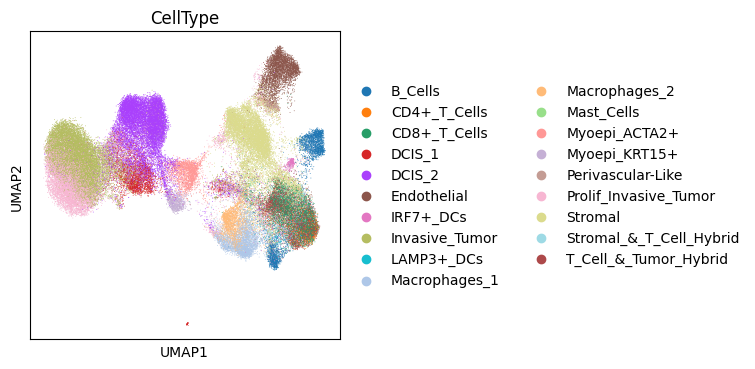

In [56]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (4, 4)
sc.pl.umap(adata, color=[ "CellType"], wspace=0.4)

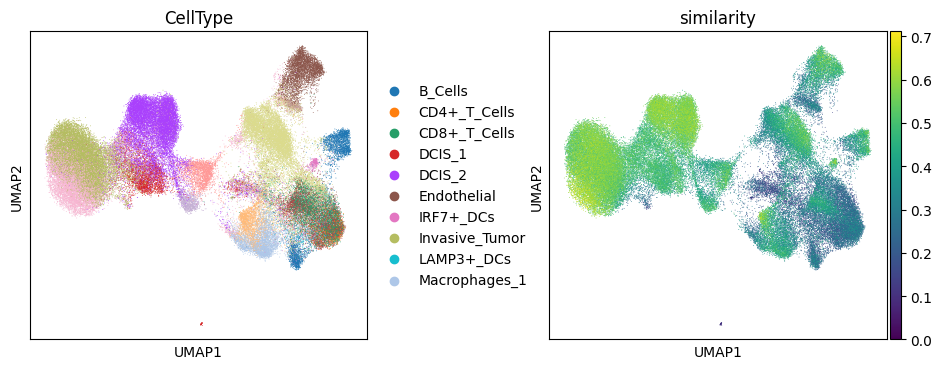

In [57]:
plt.rcParams["figure.figsize"] = (4, 4)
sc.pl.umap(adata, color=["CellType", "similarity"], wspace=0.4)

In [58]:
annotation_csv = pd.read_csv('../data/xenium/outs/insitu_replicate_1_annotation.csv')
annotation_csv

,Barcode,Cluster
0,1,DCIS_1
1,2,DCIS_1
2,3,Unlabeled
3,4,Invasive_Tumor
4,5,DCIS_1
...,...,...
167775,167776,DCIS_2
167776,167777,DCIS_1
167777,167778,DCIS_2
167778,167779,DCIS_1


In [59]:
annotation_csv[annotation_csv['Barcode']==134602]

,Barcode,Cluster
134601,134602,Stromal


In [60]:
annotation_unlabeled = annotation_csv[annotation_csv['Cluster'] == 'Unlabeled']['Barcode'].values
annotation_unlabeled

array([     3,      6,      7, ..., 167622, 167623, 167772])

In [61]:
import geopandas as gpd
joined = gpd.read_file('../data/xenium/outs/final_adatas/filtered_gdf_stardist.geojson')

In [62]:
joined

,id,cell_id,geometry
0,ID_100000,128986.0,"POLYGON ((21176.62695 13282.00000, 21176.22559..."
1,ID_100002,144585.0,"POLYGON ((23761.49170 11064.00000, 23757.71216..."
2,ID_100004,140484.0,"POLYGON ((23474.28027 12904.00000, 23474.30981..."
3,ID_100005,131974.0,"POLYGON ((21813.59644 11330.00000, 21814.07300..."
4,ID_100008,145665.0,"POLYGON ((22299.68652 10864.00000, 22299.21729..."
...,...,...,...
83942,ID_99987,142942.0,"POLYGON ((22340.07520 13966.00000, 22339.93823..."
83943,ID_99989,131200.0,"POLYGON ((21563.78711 10904.00000, 21563.85486..."
83944,ID_99991,140498.0,"POLYGON ((23375.42603 12936.00000, 23375.14258..."
83945,ID_99995,143461.0,"POLYGON ((23854.03735 11416.00000, 23853.86353..."


In [63]:
adata.obs.reset_index(drop=True, inplace=True)

In [64]:
adata.obs['id'] = adata.obs['id'].values

In [65]:
# Ensure IDs are of the same type
joined['id'] = joined['id'].astype(str)
adata.obs['id'] = adata.obs['id'].astype(str)

# Filter joined to only include rows with ids present in adata.obs['id']
filtered_joined = joined[joined['id'].isin(adata.obs['id'])]

# Drop duplicates based on the 'id' column

# Check the resulting DataFrame
print(filtered_joined)


              id   cell_id                                           geometry
0      ID_100000  128986.0  POLYGON ((21176.62695 13282.00000, 21176.22559...
1      ID_100002  144585.0  POLYGON ((23761.49170 11064.00000, 23757.71216...
2      ID_100004  140484.0  POLYGON ((23474.28027 12904.00000, 23474.30981...
3      ID_100005  131974.0  POLYGON ((21813.59644 11330.00000, 21814.07300...
4      ID_100008  145665.0  POLYGON ((22299.68652 10864.00000, 22299.21729...
...          ...       ...                                                ...
83942   ID_99987  142942.0  POLYGON ((22340.07520 13966.00000, 22339.93823...
83943   ID_99989  131200.0  POLYGON ((21563.78711 10904.00000, 21563.85486...
83944   ID_99991  140498.0  POLYGON ((23375.42603 12936.00000, 23375.14258...
83945   ID_99995  143461.0  POLYGON ((23854.03735 11416.00000, 23853.86353...
83946   ID_99999  131635.0  POLYGON ((21481.13342 11146.00000, 21480.52747...

[83947 rows x 3 columns]


In [66]:
filtered_joined

,id,cell_id,geometry
0,ID_100000,128986.0,"POLYGON ((21176.62695 13282.00000, 21176.22559..."
1,ID_100002,144585.0,"POLYGON ((23761.49170 11064.00000, 23757.71216..."
2,ID_100004,140484.0,"POLYGON ((23474.28027 12904.00000, 23474.30981..."
3,ID_100005,131974.0,"POLYGON ((21813.59644 11330.00000, 21814.07300..."
4,ID_100008,145665.0,"POLYGON ((22299.68652 10864.00000, 22299.21729..."
...,...,...,...
83942,ID_99987,142942.0,"POLYGON ((22340.07520 13966.00000, 22339.93823..."
83943,ID_99989,131200.0,"POLYGON ((21563.78711 10904.00000, 21563.85486..."
83944,ID_99991,140498.0,"POLYGON ((23375.42603 12936.00000, 23375.14258..."
83945,ID_99995,143461.0,"POLYGON ((23854.03735 11416.00000, 23853.86353..."


In [67]:
adata.obs = adata.obs.merge(filtered_joined[['id', 'cell_id']], on='id', how='left')

# Now adata.obs has a new 'cell_id' column
print(adata.obs.head())

          id  n_genes_by_counts  log1p_n_genes_by_counts  total_counts   
0  ID_100000                 50                 3.931826         105.0  \
1  ID_100002                 32                 3.496508          45.0   
2  ID_100004                 41                 3.737670         103.0   
3  ID_100005                 10                 2.397895          11.0   
4  ID_100008                 18                 2.944439          24.0   

   log1p_total_counts  pct_counts_in_top_50_genes   
0            4.663439                       100.0  \
1            3.828641                       100.0   
2            4.644391                       100.0   
3            2.484907                       100.0   
4            3.218876                       100.0   

   pct_counts_in_top_100_genes  pct_counts_in_top_200_genes   
0                        100.0                        100.0  \
1                        100.0                        100.0   
2                        100.0                 

In [68]:
annotation_csv['Barcode'] = annotation_csv['Barcode'].astype(float)

In [69]:
adata.obs['cell_id'] = adata.obs['cell_id'].astype(float)

In [70]:
# Perform the merge
merged_df = adata.obs.merge(annotation_csv, left_on='cell_id', right_on='Barcode', how='left')


In [71]:
adata.obs['realCellType'] = merged_df['Cluster']

In [72]:
adata.obs[adata.obs['cell_id']=='4']

,id,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,clusters,CellType,similarity,cell_id,realCellType


In [73]:
# Filter out rows in adata where 'cell_id' is in the unlabeled_cell_ids list
adata = adata[~adata.obs['cell_id'].isin(annotation_unlabeled)]

/Users/lollijagladiseva/anaconda3/lib/python3.11/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/Users/lollijagladiseva/anaconda3/lib/python3.11/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


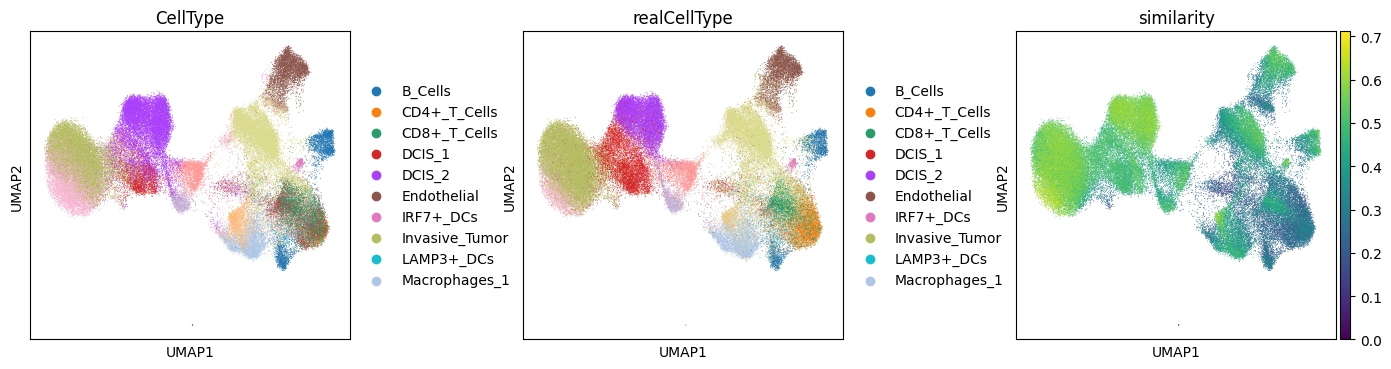

In [74]:
plt.rcParams["figure.figsize"] = (4, 4)
sc.pl.umap(adata, color=["CellType", "realCellType", 'similarity'], wspace=0.4)

In [75]:
adata.obs

,id,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,clusters,CellType,similarity,cell_id,realCellType
0,ID_100000,50,3.931826,105.0,4.663439,100.0,100.0,100.0,100.0,3,DCIS_2,0.532738,128986.0,DCIS_2
1,ID_100002,32,3.496508,45.0,3.828641,100.0,100.0,100.0,100.0,5,Endothelial,0.291986,144585.0,Endothelial
2,ID_100004,41,3.737670,103.0,4.644391,100.0,100.0,100.0,100.0,3,DCIS_2,0.549859,140484.0,DCIS_2
3,ID_100005,10,2.397895,11.0,2.484907,100.0,100.0,100.0,100.0,4,Macrophages_2,0.347992,131974.0,Macrophages_2
4,ID_100008,18,2.944439,24.0,3.218876,100.0,100.0,100.0,100.0,1,T_Cell_&_Tumor_Hybrid,0.243888,145665.0,Stromal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83942,ID_99987,10,2.397895,11.0,2.484907,100.0,100.0,100.0,100.0,7,Myoepi_ACTA2+,0.358556,142942.0,Myoepi_ACTA2+
83943,ID_99989,17,2.890372,18.0,2.944439,100.0,100.0,100.0,100.0,6,Stromal,0.205105,131200.0,Stromal
83944,ID_99991,42,3.761200,92.0,4.532599,100.0,100.0,100.0,100.0,3,DCIS_2,0.481582,140498.0,DCIS_2
83945,ID_99995,36,3.610918,76.0,4.343805,100.0,100.0,100.0,100.0,3,DCIS_2,0.543553,143461.0,DCIS_2


In [76]:
from sklearn.metrics import adjusted_rand_score

# Assuming 'CellType' and 'realCellType' are the columns in adata.obs
ari_score = adjusted_rand_score(adata.obs['CellType'], adata.obs['realCellType'])

print(f"Adjusted Rand Index: {ari_score}")

Adjusted Rand Index: 0.506300578429271


In [77]:
adata.obs['cell_id'] = adata.obs['cell_id'].astype(str)
filtered_joined['cell_id'] = filtered_joined['cell_id'].astype(str)

In [78]:
filtered_joined_with_types = filtered_joined.merge(
    adata.obs[['cell_id', 'CellType', 'realCellType']],
    on='cell_id',
    how='left'
)

# Check the resulting GeoDataFrame
print(filtered_joined_with_types)

              id   cell_id                                           geometry   
0      ID_100000  128986.0  POLYGON ((21176.62695 13282.00000, 21176.22559...  \
1      ID_100002  144585.0  POLYGON ((23761.49170 11064.00000, 23757.71216...   
2      ID_100004  140484.0  POLYGON ((23474.28027 12904.00000, 23474.30981...   
3      ID_100005  131974.0  POLYGON ((21813.59644 11330.00000, 21814.07300...   
4      ID_100008  145665.0  POLYGON ((22299.68652 10864.00000, 22299.21729...   
...          ...       ...                                                ...   
83950   ID_99987  142942.0  POLYGON ((22340.07520 13966.00000, 22339.93823...   
83951   ID_99989  131200.0  POLYGON ((21563.78711 10904.00000, 21563.85486...   
83952   ID_99991  140498.0  POLYGON ((23375.42603 12936.00000, 23375.14258...   
83953   ID_99995  143461.0  POLYGON ((23854.03735 11416.00000, 23853.86353...   
83954   ID_99999  131635.0  POLYGON ((21481.13342 11146.00000, 21480.52747...   

                    CellTyp

In [79]:
filtered_joined_with_types.crs = None


In [80]:
filtered_joined_with_types = filtered_joined_with_types[
    ~((filtered_joined_with_types['CellType'] == 'nan') | 
      (filtered_joined_with_types['realCellType'] == 'nan'))
]

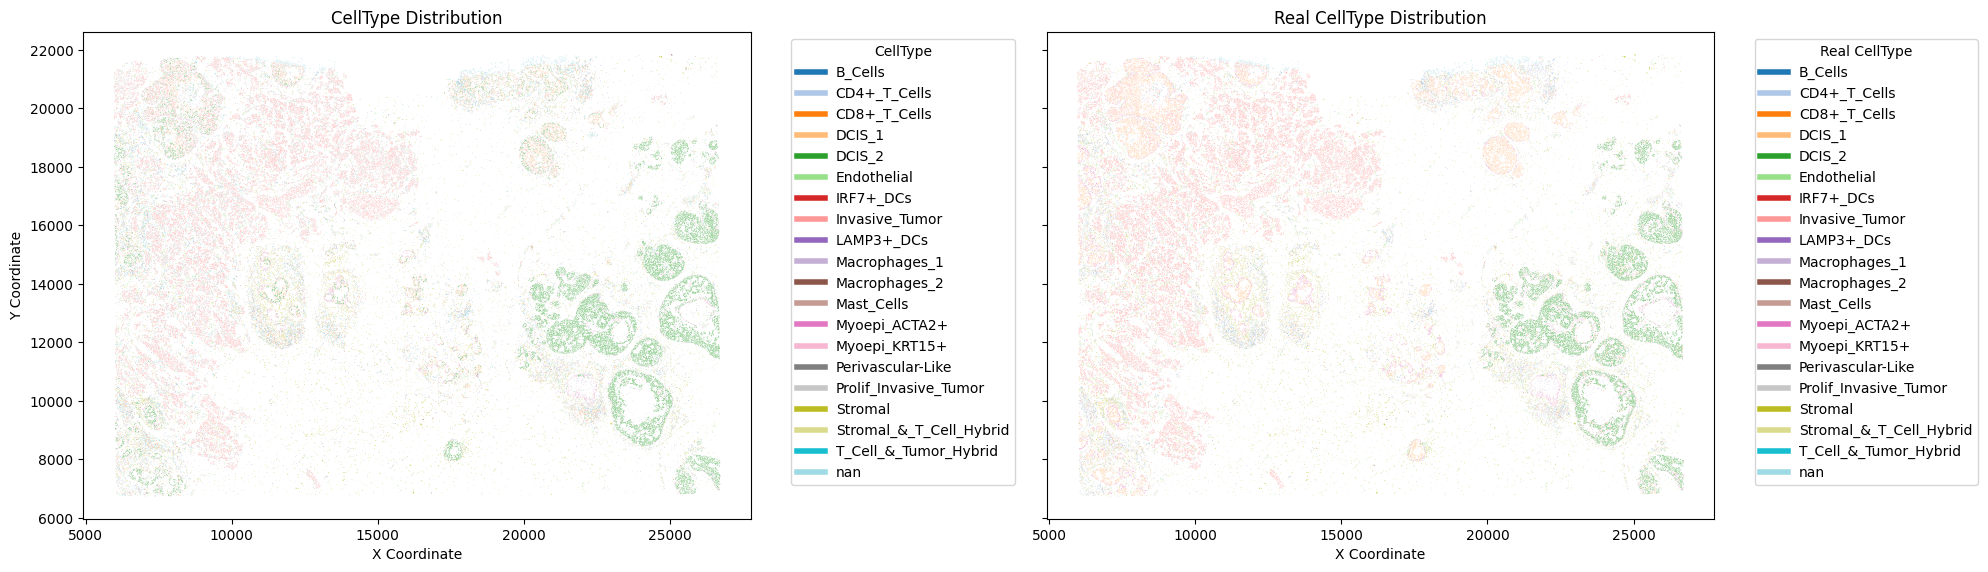

In [81]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Convert CellType and realCellType to string to ensure proper handling
filtered_joined_with_types['CellType'] = filtered_joined_with_types['CellType'].astype(str)
filtered_joined_with_types['realCellType'] = filtered_joined_with_types['realCellType'].astype(str)

# Extract unique categories from both columns
cell_type_categories = filtered_joined_with_types['CellType'].unique()
real_cell_type_categories = filtered_joined_with_types['realCellType'].unique()

# Combine unique categories from both columns
all_categories = sorted(set(cell_type_categories).union(real_cell_type_categories))

# Define a colormap with enough colors for all unique categories
num_categories = len(all_categories)
cmap = plt.get_cmap('tab20', num_categories) 
colors = {category: cmap(i) for i, category in enumerate(all_categories)}

# Define functions to get color based on category
def get_color(category):
    return colors.get(category, 'gray')  # Default to gray for unknown types

# Create legend handles
handles = [Line2D([0], [0], color=colors[cat], lw=4) for cat in all_categories]

# Create a figure with two subplots
fig, axarr = plt.subplots(1, 2, figsize=(20, 10), sharex=True, sharey=True)

# Plot by 'CellType'
filtered_joined_with_types.plot(
    ax=axarr[0],
    color=[get_color(ct) for ct in filtered_joined_with_types['CellType']],
    alpha=0.7
)
axarr[0].set_title('CellType Distribution')
axarr[0].set_xlabel('X Coordinate')
axarr[0].set_ylabel('Y Coordinate')
axarr[0].legend(handles=handles, labels=all_categories, title='CellType', bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot by 'realCellType'
filtered_joined_with_types.plot(
    ax=axarr[1],
    color=[get_color(rct) for rct in filtered_joined_with_types['realCellType']],
    alpha=0.7
)
axarr[1].set_title('Real CellType Distribution')
axarr[1].set_xlabel('X Coordinate')
axarr[1].legend(handles=handles, labels=all_categories, title='Real CellType', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout and display
plt.tight_layout()
plt.show()


In [82]:
filtered_gdf = filtered_joined_with_types

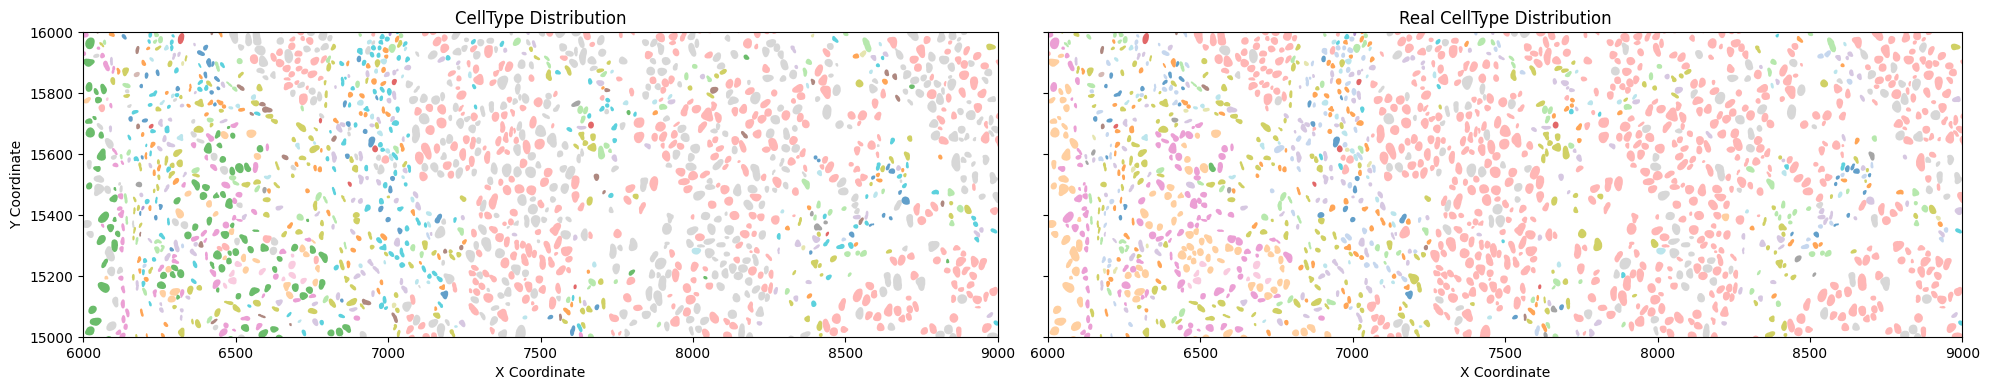

In [83]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Convert CellType and realCellType to string to ensure proper handling
filtered_gdf['CellType'] = filtered_gdf['CellType'].astype(str)
filtered_gdf['realCellType'] = filtered_gdf['realCellType'].astype(str)

# Extract unique categories from both columns
cell_type_categories = filtered_gdf['CellType'].unique()
real_cell_type_categories = filtered_gdf['realCellType'].unique()

# Combine unique categories from both columns
all_categories = sorted(set(cell_type_categories).union(real_cell_type_categories))

# Define a colormap with enough colors for all unique categories
num_categories = len(all_categories)
cmap = plt.get_cmap('tab20', num_categories) 
colors = {category: cmap(i) for i, category in enumerate(all_categories)}

# Define functions to get color based on category
def get_color(category):
    return colors.get(category, 'gray')  # Default to gray for unknown types

# Create legend handles
handles = [Line2D([0], [0], color=colors[cat], lw=4) for cat in all_categories]

# Create a figure with two subplots
fig, axarr = plt.subplots(1, 2, figsize=(20, 20), sharex=True, sharey=True)

# Define your zoom area (bounding box coordinates)
xmin, xmax, ymin, ymax = 6000, 9000, 15000, 16000  # Adjust these values as needed

# Plot by 'CellType'
filtered_gdf.plot(
    ax=axarr[0],
    color=[get_color(ct) for ct in filtered_gdf['CellType']],
    alpha=0.7
)
axarr[0].set_title('CellType Distribution')
axarr[0].set_xlabel('X Coordinate')
axarr[0].set_ylabel('Y Coordinate')
axarr[0].set_xlim(xmin, xmax)  # Set x-axis limits for zoom
axarr[0].set_ylim(ymin, ymax)  # Set y-axis limits for zoom

# Plot by 'realCellType'
filtered_gdf.plot(
    ax=axarr[1],
    color=[get_color(rct) for rct in filtered_gdf['realCellType']],
    alpha=0.7
)
axarr[1].set_title('Real CellType Distribution')
axarr[1].set_xlabel('X Coordinate')
axarr[1].set_xlim(xmin, xmax)  # Set x-axis limits for zoom
axarr[1].set_ylim(ymin, ymax)  # Set y-axis limits for zoom
# Adjust layout and display
plt.tight_layout()
plt.show()


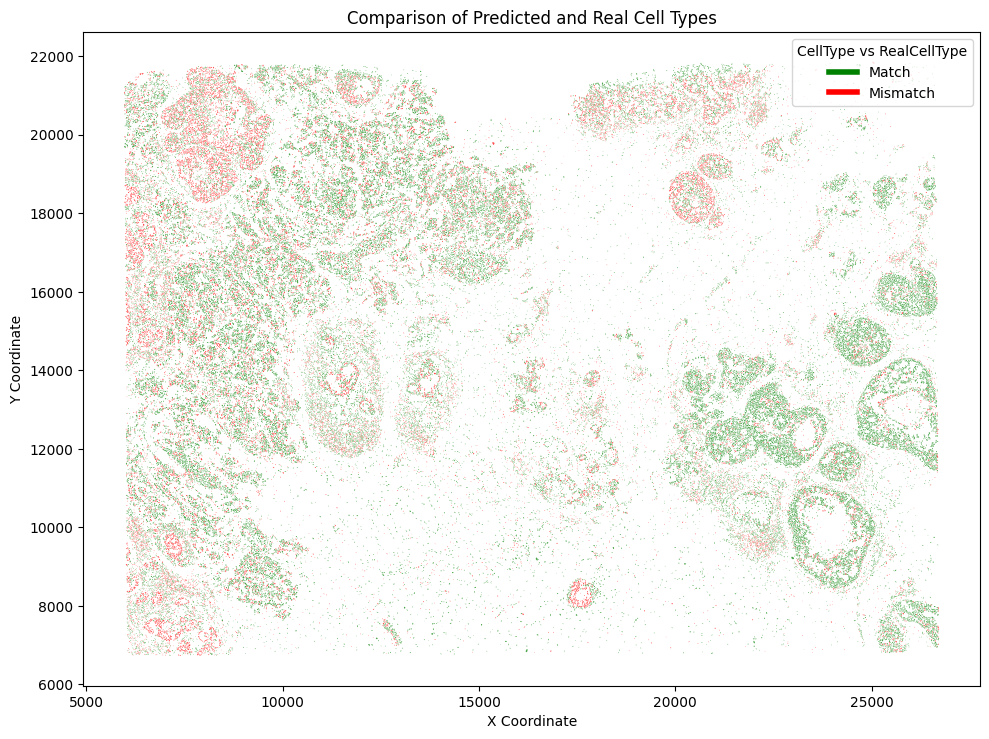

In [84]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Convert CellType and realCellType to string to ensure proper handling
filtered_joined_with_types['CellType'] = filtered_joined_with_types['CellType'].astype(str)
filtered_joined_with_types['realCellType'] = filtered_joined_with_types['realCellType'].astype(str)

# Add a new column to indicate where CellType matches realCellType
filtered_joined_with_types['Match'] = filtered_joined_with_types['CellType'] == filtered_joined_with_types['realCellType']

# Define colors for matching (green) and non-matching (red)
match_colors = {True: 'green', False: 'red'}

# Create a figure
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the polygons with colors based on the Match column
filtered_joined_with_types.plot(
    ax=ax,
    color=[match_colors[match] for match in filtered_joined_with_types['Match']],
    alpha=0.7
)

# Create custom legend
handles = [Line2D([0], [0], color='green', lw=4, label='Match'),
           Line2D([0], [0], color='red', lw=4, label='Mismatch')]

ax.legend(handles=handles, title='CellType vs RealCellType')

# Set title and labels
ax.set_title('Comparison of Predicted and Real Cell Types')
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


In [67]:
adata.write("../data/xenium/outs/final_adatas/adata_stardist_binning_stats.h5ad")